### Optimizing Time Series Forecasting: A Comparative Study of Adam and Nesterov Accelerated Gradient on LSTM and GRU networks Using Stock Market data - Experiments Code

## Step 1: Libary Imports

In [ ]:
# Import necessary libraries for data
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tabulate import tabulate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
# For time stamps
from datetime import datetime

#Yahoo Finance to fetch data
import yfinance as yf
from datetime import datetime

# Definse the stock ticker and date range
stock_ticker = 'AAPL'
start_date = '2014-01-01'
end_date = datetime.now()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## Step 2: Data Preparation and Splitting


In [ ]:

df = yf.download(stock_ticker, start=start_date, end=end_date)

# Filters the 'Close' column
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Split the dataset into training, validation, and test sets
training_data_len = int(np.ceil(len(dataset) * 0.70))
validation_data_len = int(np.ceil(len(dataset) * 0.85))

train_data = dataset[:training_data_len, :]
val_data = dataset[training_data_len:validation_data_len, :]
test_data = dataset[validation_data_len:, :]

print(f"Training Data Length: {len(train_data)}")
print(f"Validation Data Length: {len(val_data)}")
print(f"Test Data Length: {len(test_data)}")


[*********************100%%**********************]  1 of 1 completed

Training Data Length: 1876
Validation Data Length: 402
Test Data Length: 401


Data Scaling


In [ ]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Apply scaling to the training, validation, and test data
scaled_train_data = scaler.fit_transform(train_data)
scaled_val_data = scaler.transform(val_data)
scaled_test_data = scaler.transform(test_data)

# Verify scaling
print("Data scaling completed.")


Data scaling completed.


Preparing Training, Validation, and Test Sets


In [ ]:
# Create the training data set
x_train, y_train = [], []

for i in range(60, len(scaled_train_data)):
    x_train.append(scaled_train_data[i-60:i, 0])
    y_train.append(scaled_train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Preparing validation and test data
x_val, y_val = [], []
x_test, y_test = [], []

for i in range(60, len(scaled_val_data)):
    x_val.append(scaled_val_data[i-60:i, 0])
    y_val.append(scaled_val_data[i, 0])

for i in range(60, len(scaled_test_data)):
    x_test.append(scaled_test_data[i-60:i, 0])
    y_test.append(scaled_test_data[i, 0])

x_val, y_val = np.array(x_val), np.array(y_val)
x_test, y_test = np.array(x_test), np.array(y_test)

# Reshape the validation and test sets
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

print("Data preparation completed.")


Data preparation completed.


## Step 3: Building the LSTM and GRU Models


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
from keras.optimizers import Adam, SGD

# Function to build the model
def build_model(model_type, optimizer):
    model = Sequential()
    if model_type == 'LSTM':
        model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
        model.add(LSTM(64, return_sequences=False))
    elif model_type == 'GRU':
        model.add(GRU(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
        model.add(GRU(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

print("Model building function defined.")


Model building function defined.


## Step 4: Training Models and Evaluating Performance


**Training LSTM with Adam**

In [ ]:
# LSTM with Adam
optimizer_adam = Adam()
model_lstm_adam = build_model('LSTM', optimizer_adam)
history_lstm_adam = model_lstm_adam.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=1, epochs=10, verbose=1)

print("LSTM with Adam training completed.")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 119s 62ms/step - loss: 0.0032 - val_loss: 0.0016
Epoch 2/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 145s 64ms/step - loss: 8.1717e-04 - val_loss: 0.0015
Epoch 3/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 113s 62ms/step - loss: 6.1303e-04 - val_loss: 0.0154
Epoch 4/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 141s 61ms/step - loss: 6.0922e-04 - val_loss: 0.0011
Epoch 5/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 141s 61ms/step - loss: 4.1152e-04 - val_loss: 8.7050e-04
Epoch 6/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 148s 64ms/step - loss: 3.3123e-04 - val_loss: 9.5328e-04
Epoch 7/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 138s 62ms/step - loss: 3.0542e-04 - val_loss: 7.8052e-04
Epoch 8/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 111s 61ms/step - loss: 2.4366e-04 - val_loss: 0.0032
Epoch 9/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 142s 61ms/step - loss: 5.8926e-04 - val_loss: 0.0023
Epoch 10/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 116s 64ms/step - loss: 2.1355e-04 - val_loss: 0.0023
LSTM with Adam training completed.


**Training LSTM with Nesterov (NAG)**


In [ ]:
# LSTM with Nesterov
optimizer_nag = SGD(momentum=0.9, nesterov=True)
model_lstm_nag = build_model('LSTM', optimizer_nag)
history_lstm_nag = model_lstm_nag.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=1, epochs=10, verbose=1)

print("LSTM with Nesterov training completed.")

Epoch 1/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 117s 63ms/step - loss: 0.0038 - val_loss: 0.0071
Epoch 2/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 115s 63ms/step - loss: 6.6868e-04 - val_loss: 0.0024
Epoch 3/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 142s 64ms/step - loss: 5.6238e-04 - val_loss: 0.0024
Epoch 4/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 116s 64ms/step - loss: 4.7107e-04 - val_loss: 0.0022
Epoch 5/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 114s 63ms/step - loss: 4.6175e-04 - val_loss: 0.0021
Epoch 6/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 141s 62ms/step - loss: 4.1551e-04 - val_loss: 0.0028
Epoch 7/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 147s 65ms/step - loss: 4.0920e-04 - val_loss: 0.0031
Epoch 8/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 117s 64ms/step - loss: 3.7385e-04 - val_loss: 0.0019
Epoch 9/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 144s 65ms/step - loss: 3.8159e-04 - val_loss: 0.0025
Epoch 10/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - loss: 3.4277e-04 - val_loss: 0.0031
LSTM with Nesterov training completed.


**Training GRU with Adam**


In [ ]:
# GRU with Adam
optimizer_adam_gru = Adam()
model_gru_adam = build_model('GRU', optimizer_adam_gru)
history_gru_adam = model_gru_adam.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=1, epochs=10, verbose=1)

print("GRU with Adam training completed.")


Epoch 1/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 116s 62ms/step - loss: 0.0030 - val_loss: 8.7515e-04
Epoch 2/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 114s 63ms/step - loss: 5.2878e-04 - val_loss: 0.0022
Epoch 3/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 141s 62ms/step - loss: 4.8648e-04 - val_loss: 0.0015
Epoch 4/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 140s 61ms/step - loss: 3.5185e-04 - val_loss: 0.0028
Epoch 5/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 145s 63ms/step - loss: 5.9784e-04 - val_loss: 0.0023
Epoch 6/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 141s 62ms/step - loss: 3.0496e-04 - val_loss: 0.0040
Epoch 7/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 142s 62ms/step - loss: 3.7155e-04 - val_loss: 0.0031
Epoch 8/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 143s 62ms/step - loss: 3.5952e-04 - val_loss: 0.0042
Epoch 9/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 114s 63ms/step - loss: 2.1600e-04 - val_loss: 0.0014
Epoch 10/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 115s 63ms/step - loss: 2.4583e-04 - val_loss: 0.0030
GRU with Adam training completed.


**Training GRU with Nesterov (NAG)**


In [ ]:
# GRU with Nesterov
optimizer_nag_gru = SGD(momentum=0.9, nesterov=True)
model_gru_nag = build_model('GRU', optimizer_nag_gru)
history_gru_nag = model_gru_nag.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=1, epochs=10, verbose=1)

print("GRU with Nesterov training completed.")


Epoch 1/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 114s 62ms/step - loss: 0.0064 - val_loss: 0.0013
Epoch 2/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 141s 61ms/step - loss: 2.8380e-04 - val_loss: 0.0012
Epoch 3/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 113s 62ms/step - loss: 3.1443e-04 - val_loss: 0.0017
Epoch 4/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 141s 62ms/step - loss: 2.5040e-04 - val_loss: 0.0017
Epoch 5/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 141s 61ms/step - loss: 2.7171e-04 - val_loss: 0.0011
Epoch 6/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 139s 60ms/step - loss: 2.8591e-04 - val_loss: 0.0012
Epoch 7/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 106s 58ms/step - loss: 2.6522e-04 - val_loss: 0.0013
Epoch 8/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 144s 60ms/step - loss: 2.1667e-04 - val_loss: 0.0011
Epoch 9/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 141s 59ms/step - loss: 2.6505e-04 - val_loss: 0.0011
Epoch 10/10
1816/1816 ━━━━━━━━━━━━━━━━━━━━ 143s 60ms/step - loss: 2.3354e-04 - val_loss: 0.0012
GRU with Nesterov training completed.


##Step 4: Making Predictions and Evaluating Models


In [ ]:
# Makes predictions with each model
def make_predictions(model, x_data):
    predictions = model.predict(x_data)
    return scaler.inverse_transform(predictions)

# Predict with all models
pred_lstm_adam = make_predictions(model_lstm_adam, x_test)
pred_lstm_nag = make_predictions(model_lstm_nag, x_test)
pred_gru_adam = make_predictions(model_gru_adam, x_test)
pred_gru_nag = make_predictions(model_gru_nag, x_test)

# Calculate RMSE for each model
rmse_lstm_adam = np.sqrt(mean_squared_error(y_test, pred_lstm_adam))
rmse_lstm_nag = np.sqrt(mean_squared_error(y_test, pred_lstm_nag))
rmse_gru_adam = np.sqrt(mean_squared_error(y_test, pred_gru_adam))
rmse_gru_nag = np.sqrt(mean_squared_error(y_test, pred_gru_nag))

# Store RMSE values for comparison
rmse_values = {
    'LSTM Adam': rmse_lstm_adam,
    'LSTM NAG': rmse_lstm_nag,
    'GRU Adam': rmse_gru_adam,
    'GRU NAG': rmse_gru_nag
}

print("Predictions and RMSE calculations completed.")


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step
Predictions and RMSE calculations completed.


## Step 5: Visualizations and Analysis
Visualizations included are:
* Line Plot of Loss vs. Epochs
* Line Plot of Log(Loss) vs. Epochs
* Bar chart of Final loss by Model-Optimizer Combination
* RMSE Summary table
* Training and Validation Loss Heatmaps



**Line Plot of Loss vs. Epochs**

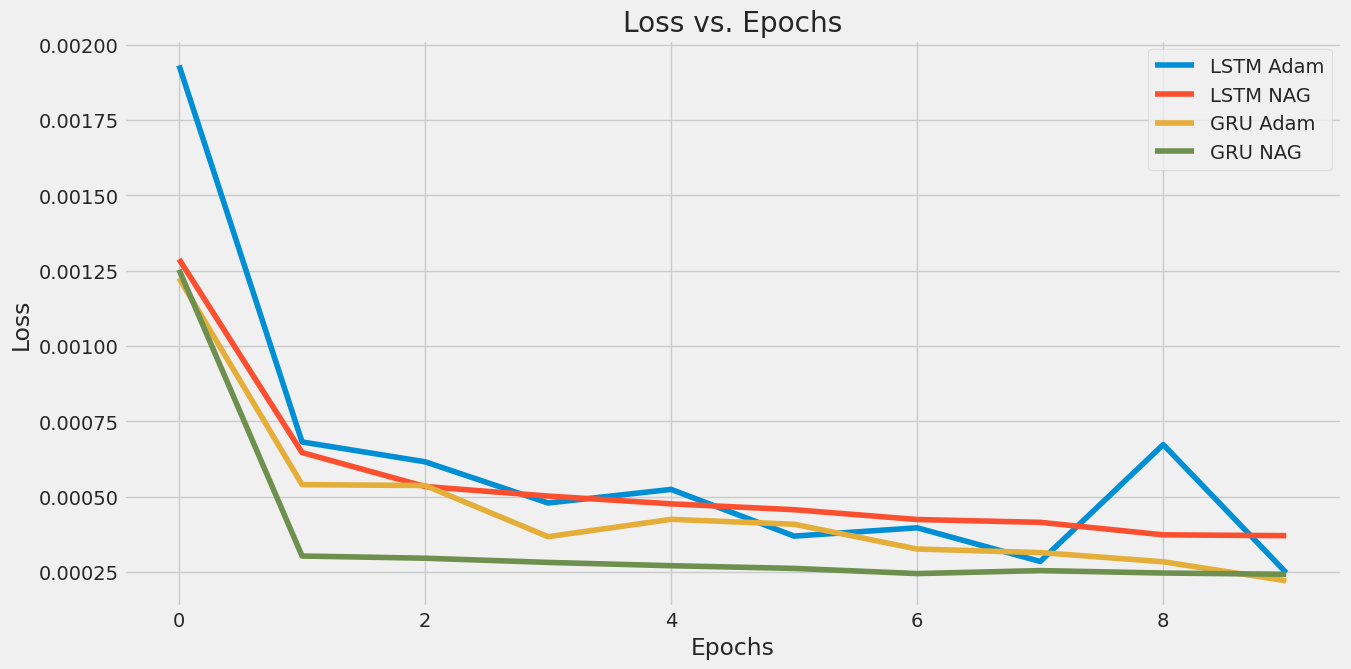

Loss vs. Epochs plot generated.


In [ ]:
# Line Plot of Loss vs. Epochs
plt.figure(figsize=(14, 7))
plt.plot(history_lstm_adam.history['loss'], label='LSTM Adam')
plt.plot(history_lstm_nag.history['loss'], label='LSTM NAG')
plt.plot(history_gru_adam.history['loss'], label='GRU Adam')
plt.plot(history_gru_nag.history['loss'], label='GRU NAG')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print("Loss vs. Epochs plot generated.")


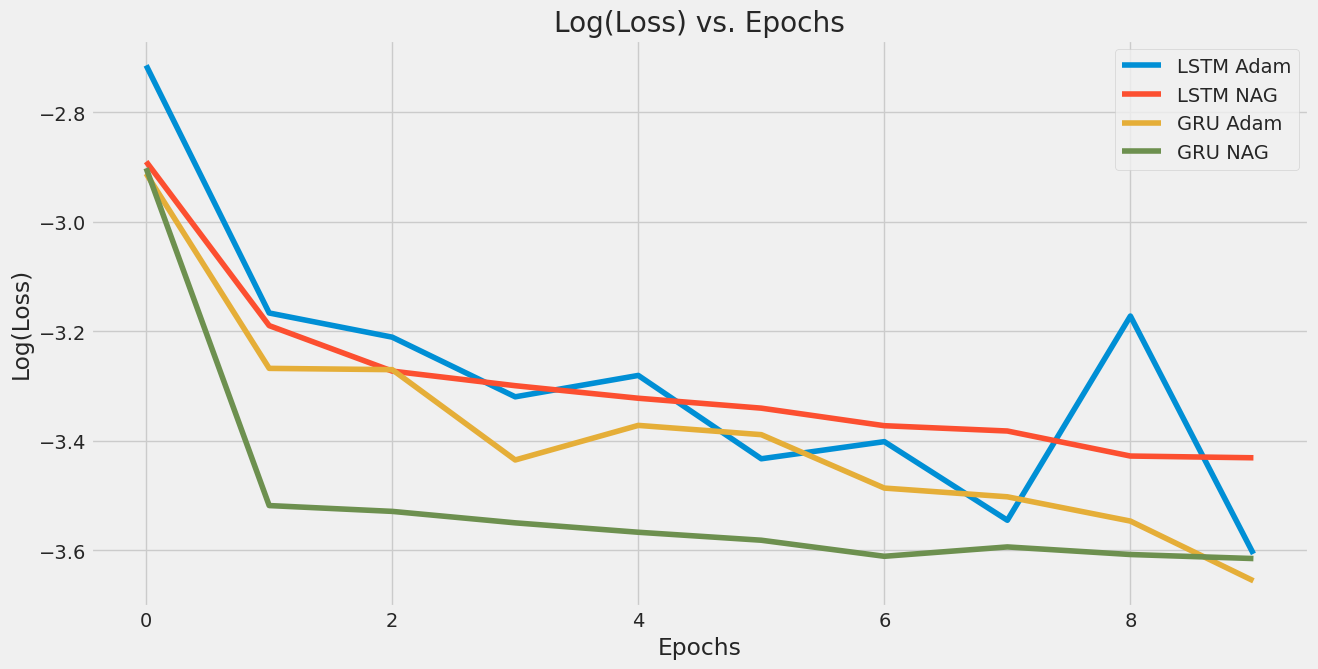

Convergence curves generated.


In [ ]:
# Convergence Curves
plt.figure(figsize=(14, 7))
plt.plot(np.log10(history_lstm_adam.history['loss']), label='LSTM Adam')
plt.plot(np.log10(history_lstm_nag.history['loss']), label='LSTM NAG')
plt.plot(np.log10(history_gru_adam.history['loss']), label='GRU Adam')
plt.plot(np.log10(history_gru_nag.history['loss']), label='GRU NAG')
plt.title('Log(Loss) vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Log(Loss)')
plt.legend()
plt.show()

print("Convergence curves generated.")


**Bar Charts of Final Loss**

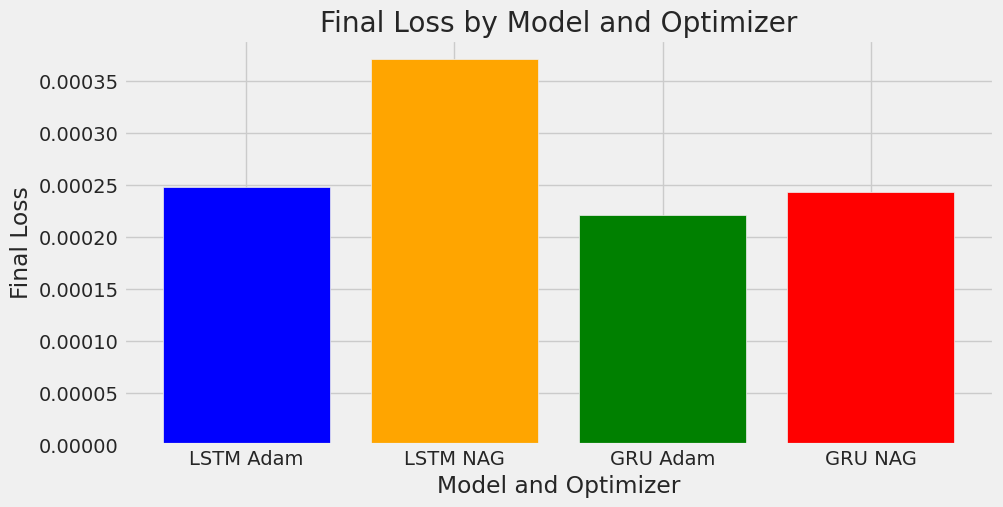

Final Loss bar chart generated.


In [ ]:
# Bar Chart of Final Loss
final_losses = [
    history_lstm_adam.history['loss'][-1],
    history_lstm_nag.history['loss'][-1],
    history_gru_adam.history['loss'][-1],
    history_gru_nag.history['loss'][-1]
]

models = ['LSTM Adam', 'LSTM NAG', 'GRU Adam', 'GRU NAG']

plt.figure(figsize=(10, 5))
plt.bar(models, final_losses, color=['blue', 'orange', 'green', 'red'])
plt.title('Final Loss by Model and Optimizer')
plt.xlabel('Model and Optimizer')
plt.ylabel('Final Loss')
plt.show()

print("Final Loss bar chart generated.")


**RMSE Summary Table**

In [ ]:
# RMSE Summary Table
rmse_table = [[model, f"{rmse:.4f}"] for model, rmse in rmse_values.items()]
print(tabulate(rmse_table, headers=['Model & Optimizer', 'RMSE'], tablefmt='pretty'))

print("RMSE summary table generated.")


+-------------------+----------+
| Model & Optimizer |   RMSE   |
+-------------------+----------+
|     LSTM Adam     | 176.6259 |
|     LSTM NAG      | 187.6416 |
|     GRU Adam      | 172.4037 |
|      GRU NAG      | 182.2570 |
+-------------------+----------+
RMSE summary table generated.


**Heatmaps for summary**


In [ ]:
# Loss and validation loss values for each model
lstm_adam_loss = [0.0032, 8.1717e-04, 6.1303e-04, 6.0922e-04, 4.1152e-04, 3.3123e-04, 3.0542e-04, 2.4366e-04, 5.8926e-04, 2.1355e-04]
lstm_adam_val_loss = [0.0016, 0.0015, 0.0154, 0.0011, 8.7050e-04, 9.5328e-04, 7.8052e-04, 0.0032, 0.0023, 0.0023]

lstm_nag_loss = [0.0038, 6.6868e-04, 5.6238e-04, 4.7107e-04, 4.6175e-04, 4.1551e-04, 4.0920e-04, 3.7385e-04, 3.8159e-04, 3.4277e-04]
lstm_nag_val_loss = [0.0071, 0.0024, 0.0024, 0.0022, 0.0021, 0.0028, 0.0031, 0.0019, 0.0025, 0.0031]

gru_adam_loss = [0.0064, 2.8380e-04, 3.1443e-04, 2.5040e-04, 2.7171e-04, 2.8591e-04, 2.6522e-04, 2.1667e-04, 2.6505e-04, 2.3354e-04]
gru_adam_val_loss = [0.0013, 0.0012, 0.0017, 0.0017, 0.0011, 0.0012, 0.0013, 0.0011, 0.0011, 0.0012]

gru_nag_loss = [0.0030, 5.2878e-04, 4.8648e-04, 3.5185e-04, 5.9784e-04, 3.0496e-04, 3.7155e-04, 3.5952e-04, 2.1600e-04, 2.4583e-04]
gru_nag_val_loss = [8.7515e-04, 0.0022, 0.0015, 0.0028, 0.0023, 0.0040, 0.0031, 0.0042, 0.0014, 0.0030]


In [ ]:
# Convert lists into a DataFrame
epochs = np.arange(1, 11)
data = {
    'Epoch': epochs,
    'LSTM Adam Loss': lstm_adam_loss,
    'LSTM Adam Val Loss': lstm_adam_val_loss,
    'LSTM NAG Loss': lstm_nag_loss,
    'LSTM NAG Val Loss': lstm_nag_val_loss,
    'GRU Adam Loss': gru_adam_loss,
    'GRU Adam Val Loss': gru_adam_val_loss,
    'GRU NAG Loss': gru_nag_loss,
    'GRU NAG Val Loss': gru_nag_val_loss
}

df = pd.DataFrame(data)


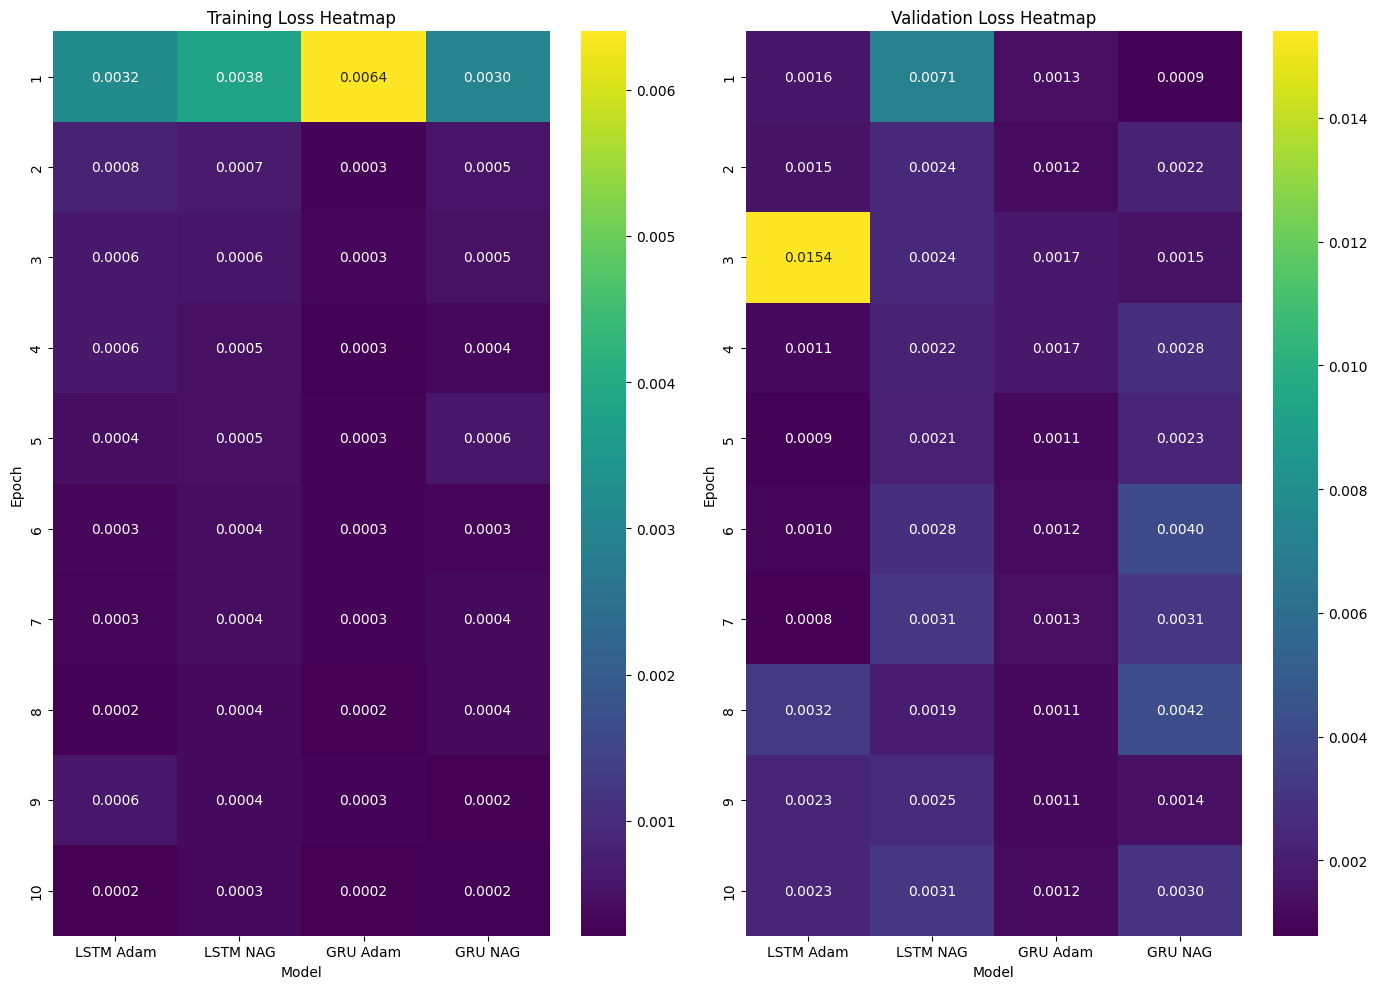

In [ ]:
# Create heatmaps for loss values
plt.figure(figsize=(14, 10))

# Heatmap for training loss
plt.subplot(1, 2, 1)
loss_matrix = df[['LSTM Adam Loss', 'LSTM NAG Loss', 'GRU Adam Loss', 'GRU NAG Loss']].values
sns.heatmap(loss_matrix, annot=True, cmap='viridis', fmt='.4f', xticklabels=['LSTM Adam', 'LSTM NAG', 'GRU Adam', 'GRU NAG'], yticklabels=epochs)
plt.title('Training Loss Heatmap')
plt.xlabel('Model')
plt.ylabel('Epoch')

# Heatmap for validation loss
plt.subplot(1, 2, 2)
val_loss_matrix = df[['LSTM Adam Val Loss', 'LSTM NAG Val Loss', 'GRU Adam Val Loss', 'GRU NAG Val Loss']].values
sns.heatmap(val_loss_matrix, annot=True, cmap='viridis', fmt='.4f', xticklabels=['LSTM Adam', 'LSTM NAG', 'GRU Adam', 'GRU NAG'], yticklabels=epochs)
plt.title('Validation Loss Heatmap')
plt.xlabel('Model')
plt.ylabel('Epoch')

plt.tight_layout()
plt.show()


**Training Loss Histogram**

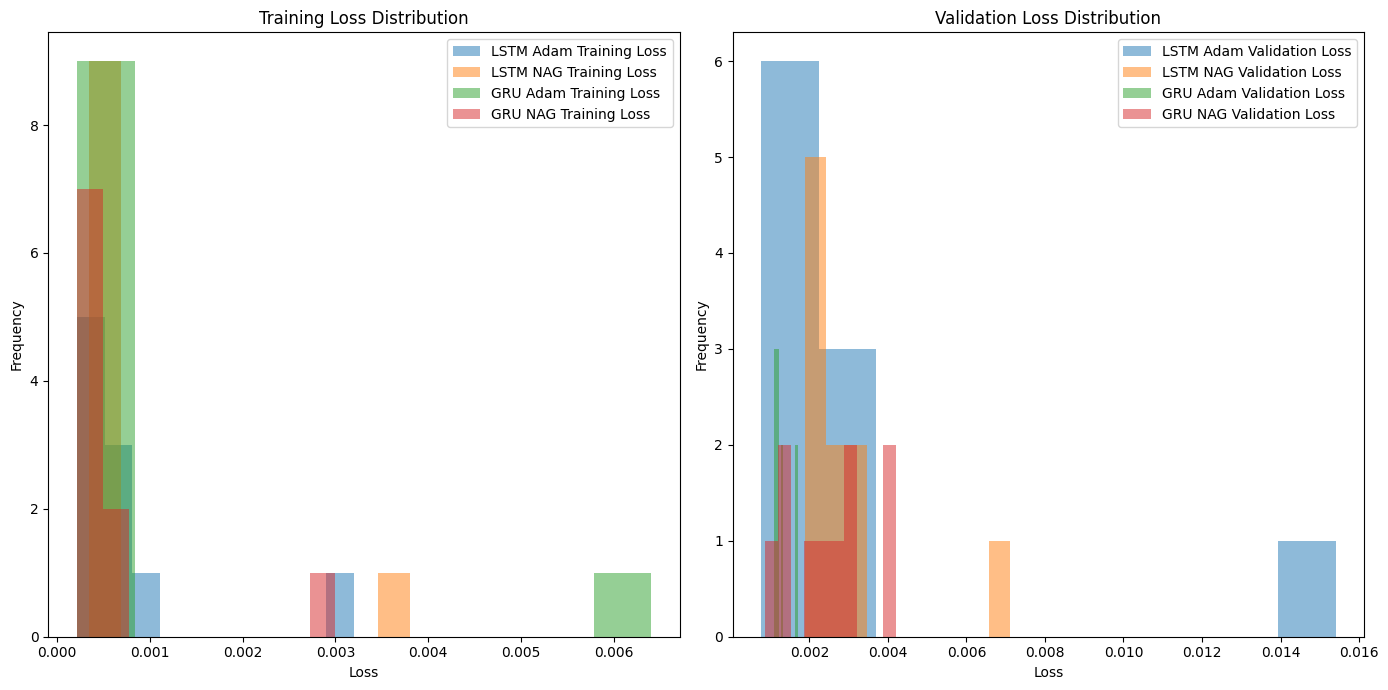

In [ ]:
plt.figure(figsize=(14, 7))

# Training loss histogram
plt.subplot(1, 2, 1)
plt.hist(lstm_adam_loss, bins=10, alpha=0.5, label='LSTM Adam Training Loss')
plt.hist(lstm_nag_loss, bins=10, alpha=0.5, label='LSTM NAG Training Loss')
plt.hist(gru_adam_loss, bins=10, alpha=0.5, label='GRU Adam Training Loss')
plt.hist(gru_nag_loss, bins=10, alpha=0.5, label='GRU NAG Training Loss')
plt.title('Training Loss Distribution')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.legend()

# Validation loss histogram
plt.subplot(1, 2, 2)
plt.hist(lstm_adam_val_loss, bins=10, alpha=0.5, label='LSTM Adam Validation Loss')
plt.hist(lstm_nag_val_loss, bins=10, alpha=0.5, label='LSTM NAG Validation Loss')
plt.hist(gru_adam_val_loss, bins=10, alpha=0.5, label='GRU Adam Validation Loss')
plt.hist(gru_nag_val_loss, bins=10, alpha=0.5, label='GRU NAG Validation Loss')
plt.title('Validation Loss Distribution')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
